# Coursework A

This notebook describes the first part of the ML coursework (code).  This part builds on work that you have already done during the labs.  
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- Don't use libraries that implement kNN or cross-validation - your code  should be as low-level as possible.  
- For more details, read the coursework PDF

In [1]:
# Load the IRIS dataset, as in the labs
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt

iris = datasets.load_iris()

#view a description of the dataset (uncomment next line to do so)
#print(iris.DESCR)

#Set X equal to features, Y equal to the targets

X=iris.data 
y=iris.target 


mySeed=1234567
#initialize random seed generator 
np.random.seed(mySeed)

#we add some random noise to our data to make the task more challenging
#X=X+np.random.normal(0,0.5,X.shape)

## 1. Exploratory Data Analysis

Create a function that given data X and labels y plots the 4x4 grid.  The function should be invoked as
    
    myplotGrid(X,y)
    
where X is your training data and y are the labels.  The final plot should look similarly to the plot from previous lab notebooks, that is:


<img src="iris_km.png" style="width: 500px">

In [2]:

def myplotgrid(X,y):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  t=1
  a = list(iris.target_names)
  
  for i in range(4):
    for j in range(4):
        ax = plt.subplot(4,4,t)
        if i !=j:
            
            scatter=ax.scatter(X[:, i], X[:, j],c=y,cmap=plt.cm.Paired, label=["data","data2","data3"])
          
        else:
            #if i ==j:
            ax.hist(X[:,i])
            
        t=t+1
        if j==0:
            plt.ylabel(iris.feature_names[1])
        if i == 3:
            plt.xlabel(iris.feature_names[3])

  fig.suptitle('PAIRED (HIST AND SCATTER) PLOT OF IRIS DATASET') 
  plt.legend(handles=scatter.legend_elements()[0], 
           labels=a,
           title="species", loc=1,bbox_to_anchor=(2, 3))
  plt.savefig('Clean_Data')
  return plt.show()


#### Data without noise

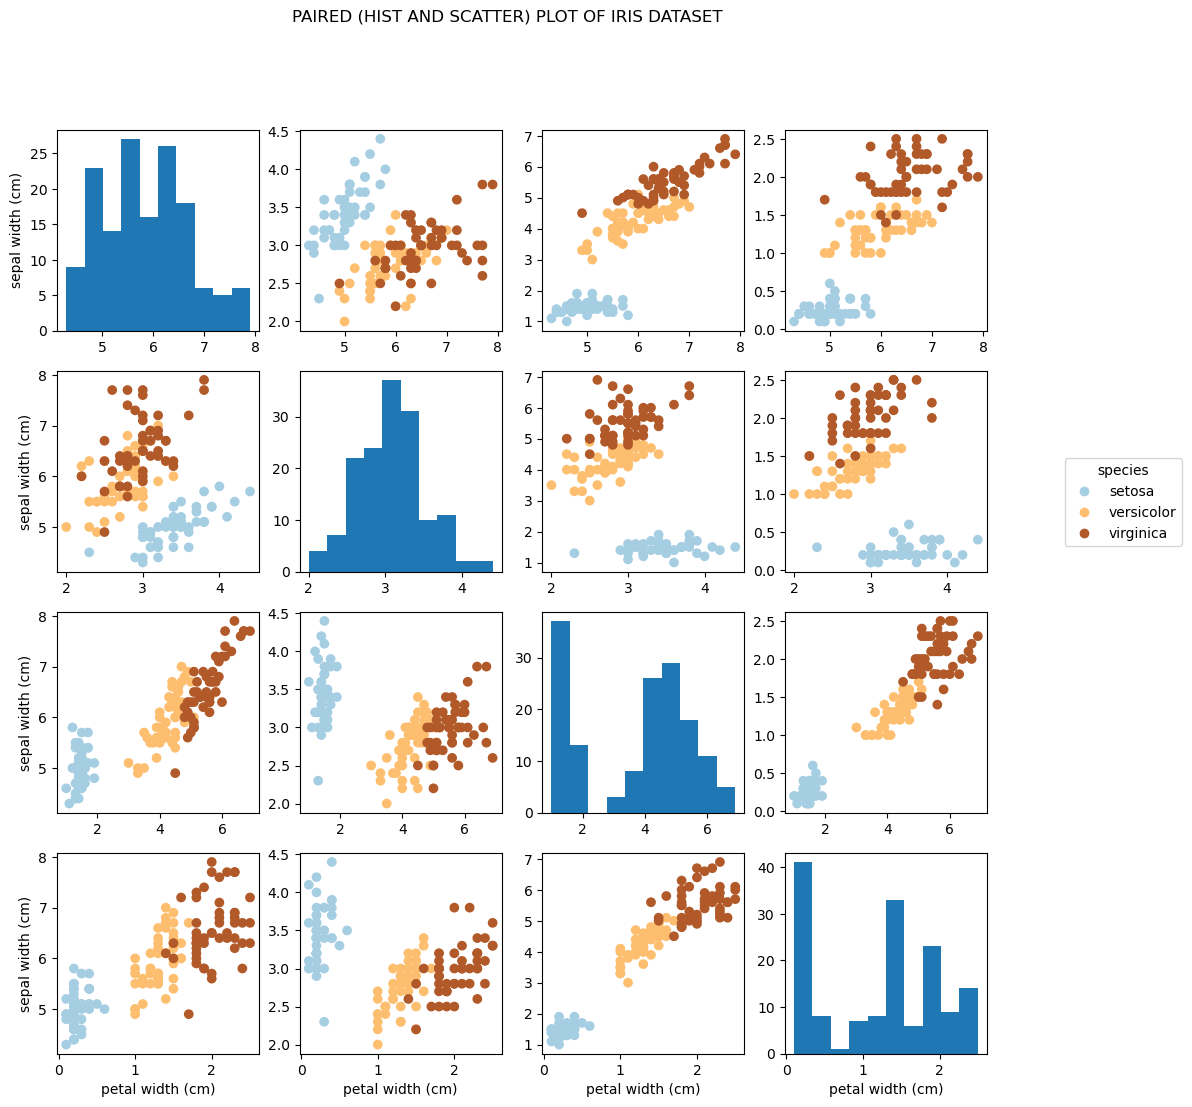

In [23]:
myplotgrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,


    np.random.seed(mySeed) # initialize random seed to replicate results over different runs
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

#### Noisy Data

In [24]:
np.random.seed(mySeed) # initialize random seed to replicate results over different runs
XN=X+np.random.normal(0,0.5,X.shape)

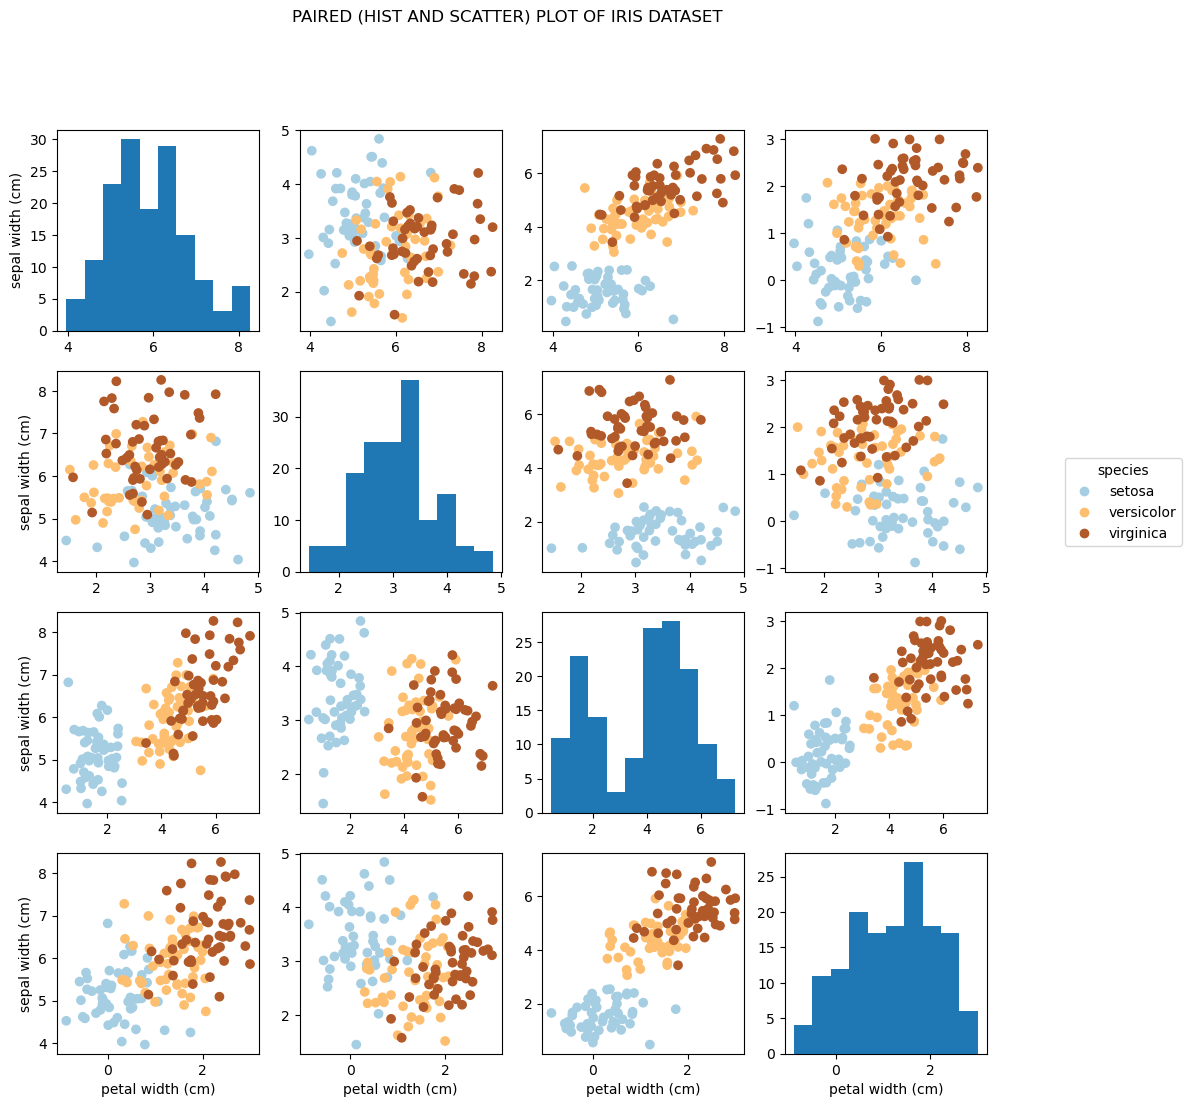

In [25]:
myplotgrid(XN,y)

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You are guided to do this by following the notebook accompanying the coursework.  Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

**Note:** if you need help implementing k-NN, you can use Nested Cross-Validation.ipynb

In [6]:
def accuracy(a,b):
    a,b = np.array(a),np.array(b)
    correct=[]
    c= a-b
    c=list(c)
    for i in range(len(c)):
        if c[i]==0:
            correct.append(i)
    ac = len(correct)/len(b)
    return ac

In [7]:
def confusion_mat(Y_test,Y_pred):
  #from tabulate import tabulate
  y_test,y_pred = Y_test, Y_pred
  c_00,c_11,c_22 =[],[],[]
  w_01,w_02,w_10,w_12,w_20,w_21=[],[],[],[],[],[]
  for i in range(len(y_test)):
    if (y_test[i]==0 and y_pred[i]==0):
        c_00.append(i)
    elif (y_test[i]==1 and y_pred[i]==1):
        c_11.append(i)
    elif (y_test[i]==2 and y_pred[i]==2):
        c_22.append(i)
        #print(f"Values at index {i} are equal: {y_test[i]} and {y_pred[i]} \n")
    elif (y_test[i]==0 and y_pred[i]==1):
        w_01.append(i)
    elif (y_test[i]==0 and y_pred[i]==2):
        w_02.append(i)
    elif (y_test[i]==1 and y_pred[i]==0):
        w_10.append(i)
    elif (y_test[i]==1 and y_pred[i]==2):
        w_12.append(i)
    elif (y_test[i]==2 and y_pred[i]==0):
        w_20.append(i)
    else:
        w_21.append(i)
        #print(f"Values at index {i} are not equal: {y_test[i]} and {y_pred[i]}")
  
  #Confusion Matrix
  conf_mat = [[len(c_00),len(w_01),len(w_02)],[len(w_10),len(c_11),len(w_12)],[len(w_20),len(w_21),len(c_22)]]
  return conf_mat


In [8]:
np.random.seed(mySeed)
#indices= np.random.permutation(X.shape[0])
indices = np.random.RandomState(seed=mySeed).permutation(X.shape[0]) 
bins=np.array_split(indices,2) # we  just need a training and testing set here
foldTrain=bins[0]
foldTest=bins[1]
X_train,XN_train=X[foldTrain],XN[foldTrain]
X_test,XN_test= X[foldTest],XN[foldTest]
y_test= y[foldTest]
y_train= y[foldTrain]

In [9]:
def kNN(X_train, y_train, X_test, k=10, distance='',result=''):
    
    
    # Define distance functions
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def manhattan_distance(x1, x2):
        return np.sum(np.abs(x1 - x2))

    if distance == 'euclidean':
        dist_func = euclidean_distance
    elif distance == 'manhattan':
        dist_func = manhattan_distance
    else:
        raise ValueError("Unsupported distance metric. Please choose 'euclidean' or 'manhattan'.")

    n_test = X_test.shape[0]
    y_pred = np.zeros(n_test)

    for i in range(n_test):
        # Find the k nearest neighbors
        distances = np.zeros(X_train.shape[0])
        for j in range(X_train.shape[0]):
            distances[j] = dist_func(X_test[i], X_train[j])
        nearest_indices = np.argsort(distances)[:k]

        # Assign the class label based on the majority vote
        nearest_labels = y_train[nearest_indices]
        y_pred[i] = np.argmax(np.bincount(nearest_labels))

    if result == 'y_pred':
        return y_pred
    elif result == 'accuracy':
        return accuracy(y_pred,y_test)
    else:
        raise ValueError("Unsupported distance metric. Please choose 'y_pred' or 'accuracy'.")
    


#### KNN implementation on data without noise



In [10]:
Manhattan = kNN(X_train, y_train, X_test, k=5, distance='manhattan',result='accuracy')
Euclidean = kNN(X_train, y_train, X_test, k=5, distance='euclidean',result='accuracy')
print(f"Euclidean = {Euclidean:.3f} \n Manhattan = {Manhattan:.3f}")


Euclidean = 0.960 
 Manhattan = 0.947


#### KNN implementation on noisy data

In [11]:
Manhattan = kNN(XN_train, y_train, XN_test, k=10, distance='manhattan',result='accuracy')
Euclidean = kNN(XN_train, y_train, XN_test, k=10, distance='euclidean',result='accuracy')
print(f"Euclidean = {Euclidean:.3f} \n Manhattan = {Manhattan:.3f}")

Euclidean = 0.880 
 Manhattan = 0.893


## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above.  Again, you are guided to complete this task by following the appropriate notebook accompanying this coursework.  Your code for nested cross-validation should invoke your kNN function (see above).  You cross validation function should be invoked similary to:

    accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate at least three distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each fold, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)
 
**Note:** if you need help implementing cv, you can use nested cross-validation.ipynb


In [12]:
def Kfold(X,y,n):
    X=np.array(X)
    y=np.array(y)
    indices=np.random.RandomState(seed=42).permutation(np.array(X).shape[0])
    #indices= np.random.permutation(np.array(X).shape[0])
    X=np.array([X[i] for i in indices])
    y=np.array([y[i] for i in indices])
    foldtrain=[]
    foldtest=[]
    foldtrainlabels=[]
    foldtestlabels=[]
    ind=[i for i in range(len(X))]
    for i in range(n):
        test_ind=ind[int(i*(1/n)*len(X)):int((i+1)*(1/n)*len(X))]
        train_ind=list(set(ind)-set(test_ind))
        foldtrain.append(X[train_ind])
        foldtest.append(X[test_ind])
        foldtrainlabels.append(y[train_ind])
        foldtestlabels.append(y[test_ind])
    return foldtrain,foldtest,foldtrainlabels,foldtestlabels

In [13]:
def myNestedCrossVal(X,y,nfolds,neighbors,distance=['euclidean','manhattan']):
  n_folds = nfolds
  n_neighbors = neighbors
  distances = distance
  for distance in distances:
    print(f"\n{'='*40}\nDistance: {distance}")
    accuracies = []
    best_distances = []
    best_nns = []
    cfm= []
    for i in range(n_folds):
        foldtrain,foldtest,foldtrainlabels,foldtestlabels = Kfold(X,y,n_folds)
        foldTrain = foldtrain[i]
        #print(len(foldTrain))
        #print(train_index)
        foldTrainLabels = foldtrainlabels[i]
        foldTest = foldtest[i]
        foldTestLabels = foldtestlabels[i]

        bestAccuracy = 0
        bestDistance = 0
        bestNN = 0
        for nn in range(1, n_neighbors+1):
            for d in [distance]:
                foldPredictions = kNN(foldTrain,foldTrainLabels, foldTest,nn,d,result='y_pred')
                #knn.fit(foldTrain, foldTrainLabels)
                #foldPredictions = knn.predict(foldTest)
                ac = accuracy(foldTestLabels, foldPredictions)
                if ac > bestAccuracy:
                    bestAccuracy = ac
                    bestDistance = d
                    bestNN = nn

        accuracies.append(bestAccuracy)
        best_distances.append(bestDistance)
        best_nns.append(bestNN)
        print(f"Fold {i+1} accuracy: {bestAccuracy:.3f}, Distance: {bestDistance}, NN: {bestNN}")
        confusion_matrix = confusion_mat(foldTestLabels,foldPredictions)
        cf=np.array(confusion_matrix)
        cfm.append(cf)

    print(f"\nAverage accuracy: {np.mean(accuracies):.3f}")
    print(f"\nStandard deviation: {np.std(accuracies):.3f}")
    print(f"Best accuracy: {np.max(accuracies):.3f}, Distance: {best_distances[np.argmax(accuracies)]}, NN: {best_nns[np.argmax(accuracies)]}\n")
    print(f"sum of confusion matrix \n {40*'='} \n {sum(cfm)}")
    #confusion_matrix = confusion_mat(foldTestLabels,foldPredictions)
    #print(np.array(confusion_matrix))
    #for i in range(len(accuracies)):
       # print(f"Fold {i+1} accuracy: {accuracies[i]:.3f}, Distance: {best_distances[i]}, NN: {best_nns[i]}")
    

#### Nested Cross Validation on Clean Data

In [14]:
myNestedCrossVal(X,y,5,10,['euclidean','manhattan'])


Distance: euclidean
Fold 1 accuracy: 1.000, Distance: euclidean, NN: 1
Fold 2 accuracy: 1.000, Distance: euclidean, NN: 5
Fold 3 accuracy: 1.000, Distance: euclidean, NN: 4
Fold 4 accuracy: 0.967, Distance: euclidean, NN: 6
Fold 5 accuracy: 0.967, Distance: euclidean, NN: 1

Average accuracy: 0.987

Standard deviation: 0.016
Best accuracy: 1.000, Distance: euclidean, NN: 1

sum of confusion matrix 
 [[50  0  0]
 [ 0 49  1]
 [ 0  3 47]]

Distance: manhattan
Fold 1 accuracy: 1.000, Distance: manhattan, NN: 1
Fold 2 accuracy: 0.967, Distance: manhattan, NN: 1
Fold 3 accuracy: 0.967, Distance: manhattan, NN: 1
Fold 4 accuracy: 0.967, Distance: manhattan, NN: 8
Fold 5 accuracy: 0.967, Distance: manhattan, NN: 1

Average accuracy: 0.973

Standard deviation: 0.013
Best accuracy: 1.000, Distance: manhattan, NN: 1

sum of confusion matrix 
 [[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


#### Nested Cross Validation on noisy Data

In [15]:
myNestedCrossVal(XN,y,5,10,['euclidean','manhattan'])


Distance: euclidean
Fold 1 accuracy: 0.867, Distance: euclidean, NN: 2
Fold 2 accuracy: 0.867, Distance: euclidean, NN: 2
Fold 3 accuracy: 0.933, Distance: euclidean, NN: 4
Fold 4 accuracy: 0.867, Distance: euclidean, NN: 10
Fold 5 accuracy: 0.933, Distance: euclidean, NN: 9

Average accuracy: 0.893

Standard deviation: 0.033
Best accuracy: 0.933, Distance: euclidean, NN: 4

sum of confusion matrix 
 [[50  0  0]
 [ 0 44  6]
 [ 0 10 40]]

Distance: manhattan
Fold 1 accuracy: 0.867, Distance: manhattan, NN: 2
Fold 2 accuracy: 0.867, Distance: manhattan, NN: 2
Fold 3 accuracy: 0.967, Distance: manhattan, NN: 8
Fold 4 accuracy: 0.867, Distance: manhattan, NN: 10
Fold 5 accuracy: 0.900, Distance: manhattan, NN: 3

Average accuracy: 0.893

Standard deviation: 0.039
Best accuracy: 0.967, Distance: manhattan, NN: 8

sum of confusion matrix 
 [[50  0  0]
 [ 0 44  6]
 [ 0 12 38]]


In [16]:
x0= np.array([[1,1],[1,1],[1,1],[1,1],[1,1]])
x1= np.array([[2,2],[1,4],[5,5],[5,7],[5,8]])
man=(np.abs(x0 - x1))
l1_norm = man[:,0]+man[:,1]
print(f"L1 norm of points \n")
for i in range(5):
  print(f"{x0[i]} and {x1[i]} = |{x1[:,0][i]}-{x0[:,0][i]}| + |{x1[:,1][i]}-{x0[:,1][i]}| =  {l1_norm[i]}")

L1 norm of points 

[1 1] and [2 2] = |2-1| + |2-1| =  2
[1 1] and [1 4] = |1-1| + |4-1| =  3
[1 1] and [5 5] = |5-1| + |5-1| =  8
[1 1] and [5 7] = |5-1| + |7-1| =  10
[1 1] and [5 8] = |5-1| + |8-1| =  11


In [17]:
"""
np.random.seed(mySeed)
indices= np.random.permutation(X.shape[0]) 
bins=np.array_split(indices,2) # we  just need a training and testing set here
foldTrain=bins[0]
foldTest=bins[1]
X_train,XN_train=X[foldTrain],XN[foldTrain]
X_test,XN_test= X[foldTest],XN[foldTest]
y_test= y[foldTest]
y_train= y[foldTrain]
"""

'\nnp.random.seed(mySeed)\nindices= np.random.permutation(X.shape[0]) \nbins=np.array_split(indices,2) # we  just need a training and testing set here\nfoldTrain=bins[0]\nfoldTest=bins[1]\nX_train,XN_train=X[foldTrain],XN[foldTrain]\nX_test,XN_test= X[foldTest],XN[foldTest]\ny_test= y[foldTest]\ny_train= y[foldTrain]\n'

In [18]:
def kNNclassifier(X_train, y_train, X_test, k=10, distance=''):
    
    
    # Define distance functions
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def manhattan_distance(x1, x2):
        return np.sum(np.abs(x1 - x2))

    if distance == 'euclidean':
        dist_func = euclidean_distance
    elif distance == 'manhattan':
        dist_func = manhattan_distance
    else:
        raise ValueError("Unsupported distance metric. Please choose 'euclidean' or 'manhattan'.")

    n_test = X_test.shape[0]
    y_pred = np.zeros(n_test)
    dist=[]
    indices=[]
    for i in range(n_test):
        # Find the k nearest neighbors
        distances = np.zeros(X_train.shape[0])
        for j in range(X_train.shape[0]):
            distances[j] = dist_func(X_test[i], X_train[j])
            dist.append(distances[j])
        nearest_indices = np.argsort(distances)[:k]
        indices.append(nearest_indices)

    return distances,indices

In [19]:
distances,indices = kNNclassifier(X_train, y_train, X_test, k=10, distance='euclidean')

In [20]:
def WeightedkNN(X_train,X_test,y_test,y_train,n,dist):
    distance,indices = kNNclassifier(X_train, y_train, X_test, k=10, distance='euclidean')
    class_0=[[i for i in indices[j] if(y_train[i]==0)] for j in range(len(indices))]
    class_1=[[i for i in indices[j] if(y_train[i]==1)] for j in range(len(indices))]
    class_2=[[i for i in indices[j] if(y_train[i]==2)] for j in range(len(indices))]
    wclass_0=[]
    wclass_1=[]
    wclass_2=[]

    for k in range(len(class_0)):
        if(len(class_0[k])==0):
            wclass_0.append(0.000001)
        else:
          wclass_0.append(sum([1/distance[k] for j in class_0[k]]))

    for k in range(len(class_1)):
        if(len(class_1[k])==0):
            wclass_1.append(0.000001)
        else:
          wclass_1.append(sum([1/distance[k] for j  in class_1[k]]))

    for k in range(len(class_2)):
        if(len(class_2[k])==0):
            wclass_2.append(0.000001)
        else:
            wclass_2.append(sum([1/distance[k] for j in class_2[k]]))

    y_pred=[]    
    for i in range(len( wclass_0)):
        a=random.choice([0,1])
        b=random.choice([0,2])
        c=random.choice([1,2])
        d=random.choice([0,1,2])
        if ( wclass_0[i]> wclass_1[i] and  wclass_0[i]> wclass_2[i]):
            y_pred.append(0)
        elif ( wclass_1[i]> wclass_0[i] and  wclass_1[i]> wclass_2[i]):
            y_pred.append(1)
        elif ( wclass_2[i]>wclass_0[i] and  wclass_2[i]> wclass_1[i]):
            y_pred.append(2)
        elif ( wclass_0[i]==wclass_1[i] and  wclass_0[i]> wclass_2[i]):
            y_pred.append(a)
        elif ( wclass_0[i]==wclass_2[i] and  wclass_0[i]> wclass_1[i]):
            y_pred.append(b)
        elif ( wclass_1[i]==wclass_2[i] and  wclass_1[i]> wclass_0[i]):
            y_pred.append(c)
        else:
            y_pred.append(d)
        
    corr_pred=[]
    for i in range(len(y_pred)):
        if (y_pred[i]==y_test[i]):
            corr_pred.append(i)
        else:
            pass
    score=len(corr_pred)/len(y_pred)
    return score

#### Clean Data

In [21]:
Euclidean= WeightedkNN(X_train,X_test,y_test,y_train,1,'euclidean')
Manhattan= WeightedkNN(X_train,X_test,y_test,y_train,1,'Manhattan')
print(f"Euclidean = {Euclidean:.3f} \n Manhattan = {Manhattan:.3f}")

Euclidean = 0.987 
 Manhattan = 0.987


#### Noisy Data

In [22]:
Euclidean=WeightedkNN(XN_train,XN_test,y_test,y_train,4,'euclidean')
Manhattan= WeightedkNN(XN_train,XN_test,y_test,y_train,8,'Manhattan')
print(f"Euclidean = {Euclidean:.3f} \n Manhattan = {Manhattan:.3f}")

Euclidean = 0.893 
 Manhattan = 0.880
